## 1. Cuestiones sobre circuitos y caminos eulerianos

1. Tras las funciones anteriores nos hemos dado cuenta de que las mismas no tratan sobre grafos NO dirigidos. Indicar brevemente que cambios harían falta, si alguno, para que nuestras funciones pudieran buscar caminos y circuitos eulerianos en tales grafos.

  Habría que modificar la función **adj_inc_directed_multigraph**, puesto que para encontrar caminos y circuitos eulerianos sobre grafos no dirigidos, basta con calcular el grado de cada nodo.
Asimismo, habría que cambiar las funciones **isthere_euler_path_multigraph** y **isthere_euler_circuit_multigraph**. En el caso de un camino, debería comprobar que todos los nodos tienen grado par excepto dos, en el caso de un circuito que todos los nodos tienen grado par.
La función **first_last_euler_path_directed_multigraph** debería ahora devolver indistintamente los dos nodos con grado impar.

2. El criterio sobre existencia de caminos o circuitos eulerianos solo funciona cuando el grafo no contiene subgrafos disjuntos. ¿Como podríamos detectar dicha condicion? 

## 2. Cuestiones sobre recontrucción de secuencias

1. Si se tiene una secuencia P de longitud $l_{P}$ y se usan lecturas (reads) de longitud $l_{R}$ para reconstruirlas mediante un camino o circuito euleriano sobre un grafo $G = (V, E)$, queremos estudiar cuantos nodos $|V|$ y cuantas ramas $|E|$ hay y cual sería el sparsity factor $\rho$.
Para ello vamos a hacer un pequeño estudio experimental de estas cantidades, fijando una longitud $l_{P}$ suficientemente grande y estimando el numero de vértices, ramas y el sparsity factor para diferentes valores de $l_{R}$. Escribir una funcion Python que estime dichos numeros de vértices, ramas y sparsity factor, describir sus resultados y comentarlos. 

In [ ]:
import grafos02 as sq
lp = 1000
N = 100
sequence = sq.random_sequence(lp)
ed = []
nd = []
rho = []
for lr in range(3,60, 3):
    num_nodes = 0
    num_edges = 0
    for _ in range(N):
        spectr = sq.spectrum(sequence, lr)
        spectr2 = sq.spectrum_2(spectr)
        num_nodes += len(spectr2)
        d_mg = sq.spectrum_2_graph(spectr)
        num_edges += sum([len([d_mg[i][j]]) for i in d_mg.keys() for j in d_mg[i].keys()])
    num_edges /= N
    num_nodes /= N
    ed.append(num_edges)
    nd.append(num_nodes)
    rho.append(num_edges/num_nodes**2)

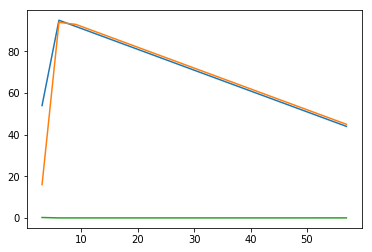

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(3,60,3), ed, label="Number of edges")
plt.plot(range(3,60,3), nd, label="Number of nodes")
plt.plot(range(3,60,3), rho, label="Sparsity factor")
plt.show()

2. El coste de reconstruir una secuencia no solo depende de la búsqueda de un camino euleriano sino también del tiempo empleado en la construccion del grafo. Discutir los costes asociados a las funciones spectrum(sequence, len_read), spectrum_2(spectr) y spectrum_2_undirected_graph(spectr) definidas más arriba de acuerdo a la implementaci ´ on que se haya seguido y, en consecuencia, el coste total del algoritmo de reconstruccion de secuencias.